### Assignment 5

## Exercise 1

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sympy as sp
from numpy import exp, array, log

In [2]:
def RK2(f, a, b, α, N):
    '''
    function that approximate the initial value problem (IVP) y'(t) = f(t,y(t))
    a < t < b, y(a) = α, using second order Runge-Kutta method.
    
    Parameters
    ==========
    f: function in IVP
    a: float number, lower bound time interval
    b: float number, upper bound time interval
    α: float number, initial condition of the IVP at t = a
    N: integer, number of subintervals
    
    Returns
    =======
    The solution y, as an array of values
    The sampled time t, as an array of values
    '''
    
    Δt = (b-a)/ N
    t = [a + i * Δt for i in range(N+1)] #careful in range, the endpoint is excluded

    y = [α]
    for i in range(1, N+1):
        y.append( y[i-1] + Δt * f(t[i-1] + 0.5*Δt, y[i-1] + 0.5*Δt*f(t[i-1], y[i-1]) ) )
    return y, t

In [3]:
f = lambda t, y: -12*y
a = 0
b = 1
α = 1
NR = [20, 50, 100]

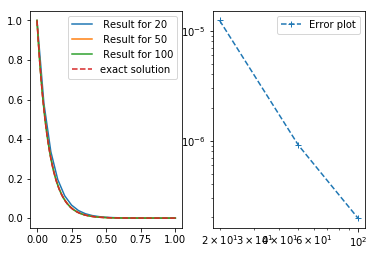

In [4]:
exact_solu = lambda t: exp(-12*t) 

result = {}
fig, (ax1, ax2) = plt.subplots(1, 2)
for N in NR:
    result[N] = RK2(f, a, b, α, N)
    y,t = result[N]
    # t is a list not an array
    ax1.plot(t,y, label = f' Result for {N}')
ax1.plot(t, exact_solu(array(t)),'--', label = 'exact solution')
ax1.legend()
error_y = [ abs(result[k][0][-1]-exact_solu(1)) for k in NR]
ax2.loglog(NR, error_y,  '--+',  label = 'Error plot',)
ax2.legend()

In [5]:
from scipy import stats
slope_et_al = stats.linregress(log(NR),log(error_y))
slope_et_al

LinregressResult(slope=-2.5899185345389535, intercept=-3.6107346389867967, rvalue=-0.9975400751843694, pvalue=0.04466271352037733, stderr=0.18199707949005028)

Comment: the sploe matches theoretical results

## Exercise 4

 Let's test how to solve using sympy the equation involved in Adams-Moulton method.

In [6]:
from sympy import dsolve, solve
from sympy.abc import s, y, x
from sympy import Derivative

In [7]:
eq = solve(y- 2.31+ 0.1*f(1,y), y) 
x = [i*eq[0] for i in range(1,10)]
x

[-11.5500000000000,
 -23.1000000000000,
 -34.6500000000000,
 -46.2000000000000,
 -57.7500000000000,
 -69.3000000000000,
 -80.8500000000000,
 -92.4000000000000,
 -103.950000000000]

In [8]:
def AM4(f, a, b, α, N):
    '''
    function that approximate the initial value problem (IVP) y'(t) = f(t,y(t))
    a < t < b, y(a) = α, using 4-step Adams-Bashforth method.
    
    Parameters
    ==========
    f: function in IVP
    a: float number, lower bound time interval
    b: float number, upper bound time interval
    α: float number, initial condition of the IVP at t = a
    N: integer, number of subintervals
    
    Returns
    =======
    The solution y, as an array of values
    The sampled time t, as an array of values
    '''
    
    Δt = (b-a)/ N
    t = [a + i * Δt for i in range(N+1)] #careful in range, the endpoint is excluded

    y = [α]
    #compute the first 3 terms using a 1-step method. For example 4th order Runge-Kutta 
    for i in range(1, 4):
        k1 = Δt * f(t[i-1], y[i-1])
        k2 = Δt * f(t[i-1] + 0.5*Δt, y[i-1] + 0.5*k1)
        k3 = Δt * f(t[i-1] + 0.5*Δt, y[i-1] + 0.5*k2)
        k4 = Δt * f(t[i], y[i-1] + k3)
        y.append( y[i-1] + (k1 + 2*k2 + 2*k3 +k4)/6)
        
    from sympy.abc import x
    for i in range(4,N+1):
        eq = solve( x - y[i-1] - Δt/720 * (251 * f(t[i], x) 
            + 646 * f(t[i-1], y[i-1]) -264* f(t[i-2], y[i-2]) + 
            106 * f(t[i-3], y[i-3]) - 19 * f(t[i-4], y[i-4])), x)
        y.append(eq[0])
    
    return y, t

In [9]:
AM4(f, a, b, α, 50)

([1,
  0.78663424,
  0.6187934275403777,
  0.4867640975902201,
  0.382904005277771,
  0.301204459375087,
  0.236936953411562,
  0.186382115933746,
  0.146614075673702,
  0.115331276656077,
  0.0907232356358361,
  0.0713657711182068,
  0.0561385762941788,
  0.0441603824825499,
  0.0347379557810324,
  0.0273259764527857,
  0.0214954787150074,
  0.0169090244949374,
  0.0133011743148843,
  0.0104631250731200,
  0.00823062563530471,
  0.00647447085599415,
  0.00509302387479628,
  0.00400633391765606,
  0.00315150917300645,
  0.00247907694957055,
  0.00195012046118496,
  0.00153402653104054,
  0.00120671386448936,
  0.000949239352309717,
  0.000746701744704545,
  0.000587379246538959,
  0.000462051122434688,
  0.000363464049847044,
  0.000285912335490296,
  0.000224907700279895,
  0.000176919521707408,
  0.000139170500263996,
  0.000109475924176207,
  8.61172299553421e-5,
  6.77425411202247e-5,
  5.32884288057695e-5,
  4.19183661792070e-5,
  3.29743147342306e-5,
  2.59386405363155e-5,
  2.04

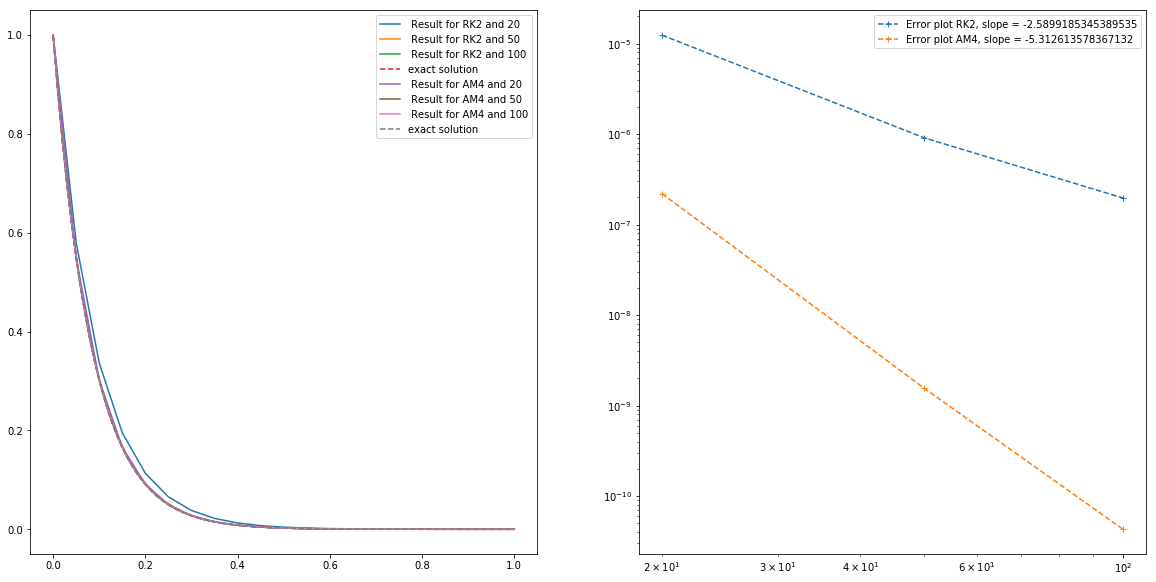

In [79]:
# for method in [RK2, AM4]: if we define all method the same way we can do a loop to execute all method at the same time
fig, (ax3, ax4) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)
for method in [RK2, AM4]:
    result = {}
    for N in NR:
        result[N] = method(f, a, b, α, N)
        y,t = result[N]
        # t is a list not an array
        ax3.plot(t,y, label = f' Result for {method.__name__} and {N}')
    ax3.plot(t, exact_solu(array(t)),'--', label = 'exact solution')
    ax3.legend()
    error_y = [ abs(result[k][0][-1]-exact_solu(1)) for k in NR]
    slope = stats.linregress(log(array(NR)), log(array(error_y, float)) )
    ax4.loglog(NR, error_y,  '--+',  label = f'Error plot {method.__name__}, slope = {slope[0]}',)
    ax4.legend()


In [76]:
fig.set_figwidth(20)
fig.set_figheight(10)

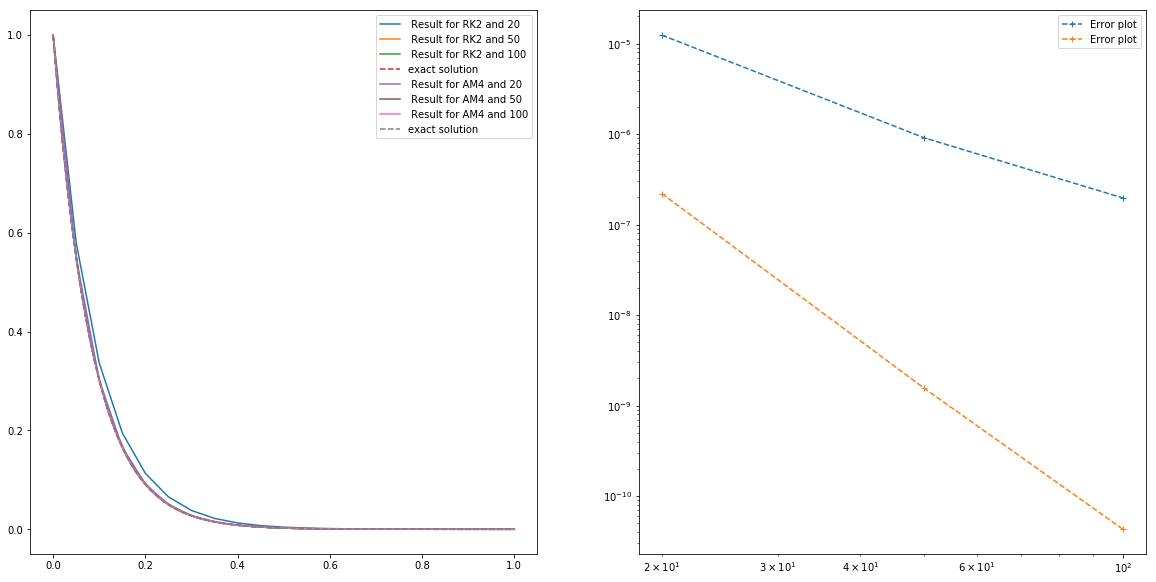

In [77]:
fig

In [21]:
stats.linregress(log(array(NR)), log(array(error_y, float)) )
#need to convert in float due to computing with sympy

LinregressResult(slope=-5.312613578367132, intercept=0.5602195692251186, rvalue=-0.9999216133606537, pvalue=0.007971113268914665, stderr=0.0665226868149435)

In [18]:
[type(u) for u in error_y]

[sympy.core.numbers.Float, sympy.core.numbers.Float, sympy.core.numbers.Float]

In [14]:
error_y

[2.20288726884323e-7, 1.55054326326204e-9, 4.29889412667178e-11]

### Assessments

In [22]:
assert len(RK2.__doc__) >0
assert 'f:' in AM4.__doc__

In [32]:
def data():
    f = lambda y, t: 1   
    a = 1
    b = 5
    α = 2
    y, t = AM4(f, a, b, α, N)
    
    assert min(y) == 2
    assert max(y) == 6, f'max(y) == {max(y)} instead of 6'

In [33]:
data()

### Comparison with scipy RK23


In [64]:
from scipy.integrate import solve_ivp

In [66]:
test = solve_ivp(f, [a, b], [α], method = 'RK23', max_step = N)
test2 = RK2(f, a, α, b, N)

In [69]:
test.t    

array([0.        , 0.00411172, 0.0318414 , 0.06304457, 0.09493035,
       0.12696365, 0.15903828, 0.19113724, 0.22326439, 0.25543143,
       0.28765679, 0.31996781, 0.35240472, 0.38502663, 0.4179203 ,
       0.45121306, 0.48509168, 0.51983033, 0.55583241, 0.59369564,
       0.6343199 , 0.6791065 , 0.7303907 , 0.7926398 , 0.87771071,
       1.        ])

In [70]:
test.y

array([[1.00000000e+00, 9.51856554e-01, 6.81973249e-01, 4.68457124e-01,
        3.19130218e-01, 2.17013409e-01, 1.47498238e-01, 1.00220953e-01,
        6.80739905e-02, 4.62160791e-02, 3.13542754e-02, 2.12494473e-02,
        1.43791408e-02, 9.70822822e-03, 6.53295157e-03, 4.37488582e-03,
        2.90884660e-03, 1.91387709e-03, 1.23992166e-03, 7.85154442e-04,
        4.80533483e-04, 2.79242249e-04, 1.49424996e-04, 6.91147596e-05,
        2.23175937e-05, 1.84279852e-06]])

In [71]:
test2

([1,
  0.8872,
  0.78712384,
  0.698336270848,
  0.6195639394963456,
  0.5496771271211578,
  0.4876735471818912,
  0.4326639710597739,
  0.3838594751242314,
  0.3405601263302181,
  0.3021449440801695,
  0.26806299438792636,
  0.23782548862096825,
  0.21099877350452304,
  0.18719811185321283,
  0.16608216483617042,
  0.1473480966426504,
  0.1307272313413594,
  0.11598119964605406,
  0.10289852032597917,
  0.09129156723320872,
  0.08099387844930278,
  0.07185776896022142,
  0.06375221262150844,
  0.056560963037802295,
  0.05018088640713819,
  0.044520482420413,
  0.039498572003390416,
  0.035043133081407975,
  0.031090267669825155,
  0.027583285476668877,
  0.024471890874900627,
  0.021711461584211837,
  0.019262408717512742,
  0.017089609014177304,
  0.015161901117378104,
  0.013451638671337854,
  0.011934293829210943,
  0.010588105485275948,
  0.009393767186536821,
  0.008334150247895468,
  0.007394058099932859,
  0.006560008346260433,
  0.005820039404802256,
  0.005163538959940562,
  